# PAN CARD TAMPERING DETECTION SYSTEM

This project is done to help the organizations that the given ID to them by their staff or customer (tampered) is original ID or Fake ID using computer Vision

In [17]:
import pip      # to install imutils if not found
pip.main(['install', 'imutils'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [18]:
!pip install opencv.python   # to install open cv in your current directory

ERROR: Invalid requirement: '#'


In [19]:
# importing all the required packages
from skimage.metrics import structural_similarity as ssim # it will help to find out that the structure of the original ID and Customer id is similar or, not.
import imutils  #  it helps to grab the content of the images
import cv2  # cv2 == computer vision to dp operation for all images 
from PIL import Image  # PIL for downloading the images
import requests  # to featch the images from different URLs


In [20]:
!mkdir pan_card_tampering # to make a text file
!mkdir pan_card_tampering/image  # to make a folder

A subdirectory or file pan_card_tampering already exists.
Error occurred while processing: pan_card_tampering.
A subdirectory or file # already exists.
Error occurred while processing: #.
A subdirectory or file to already exists.
Error occurred while processing: to.
A subdirectory or file make already exists.
Error occurred while processing: make.
A subdirectory or file a already exists.
Error occurred while processing: a.
A subdirectory or file text already exists.
Error occurred while processing: text.
A subdirectory or file file already exists.
Error occurred while processing: file.
The syntax of the command is incorrect.


In [21]:
# open image and display
original = Image.open(requests.get('https://images.livemint.com/img/2019/08/12/600x338/pan_card_1565610340828.PNG', stream = True).raw)
tampered = Image.open(requests.get('https://www.utkaltoday.com/wp-content/uploads/2021/05/Fake-PAN-cards-lead-ut.jpg', stream = True).raw)

In [22]:
# to find out the format of the source file
print("Original image format: ", original.format)
print("tampered image format: ", tampered.format)

Original image format:  JPEG
tampered image format:  JPEG


In [23]:
# to find the image size in pixel. The size is given as a 2 tuple as (width, height).

print("Original image size: ", original.size)
print("tampered image size: ", tampered.size)

Original image size:  (600, 338)
tampered image size:  (1279, 950)


In [24]:
# to resize the images
original = original.resize((250, 160))
print("image size after resizing image", original.size)
original.save('pan_card_tampering/original.png')  # to save image

image size after resizing image (250, 160)


In [25]:
tampered = tampered.resize((250,160))
print("image size after resizing image", tampered.size)
tampered.save("pan_card_tampering/tampered.png")

image size after resizing image (250, 160)


In [26]:
# change image type if required from png to jpg
tampered = Image.open('pan_card_tampering/tampered.png')
tampered.save('pan_card_tampering/tampered.jpg')  

In [27]:
original = Image.open('pan_card_tampering/original.png')
original.save('pan_card_tampering/original.jpg')  

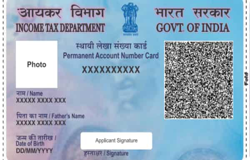

In [28]:
# to display the image
original

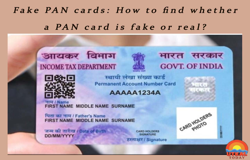

In [29]:
tampered

In [30]:
# load the two input images
original = cv2.imread('pan_card_tampering/original.jpg')
tampered = cv2.imread('pan_card_tampering/tampered.jpg')

#  Using OpenCV


we are converting images to grayscale because in many applications doesnot help us in identifying the important, edges of the coloured images also coloured images are bit complex to understand by machine because they have 3 channel while grayscale has only one channel

In [31]:
# converting the images into grayscale 
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

 computing the Structural Similarity Index (SSIM) between the two images, ensuring that the difference image is returned
To find what are similar and different in two images i.e in between original and tampered

Structural similarity index helps us to determine exactly where in terms of x,y coordinates location, the image differences are. here, we are trying to find similarities between the original and tampered images. The lower the SSIM Score  lower is the similarity.

In [32]:
(score, diff) = ssim(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.13993016452309187


 Both images are only 13% similar to each other

In [33]:
# calculating the threshold and controus

thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1] # to fing out threshold

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # to find out contours

cnts = imutils.grab_contours(cnts)   # grab contours

here we are using the threshold function of computer vision which applies an adaptive threshold to the images which is stored in the form array. This finction transforms the grayscale images into a binary image using a mathematical formula.
Find contours works on binary image and retrive the contours. this contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [ ]:
# loop over the contours
for c in cnts:
    # applying contours on image
    (x, y, w, h) = 

In [34]:
## loop over the contours
for c in cnts:
    # applying contours on image
    #(x, y, width, height)
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(tampered, (x,y), (x+w, y+h), (0,0,255), 2)

Bounding rectangle helps in finding the ratio of width to height of bounding rectangle of the object. we compute the bounding box of the contour and then draw the bounding box on both input images to represent where the two images are different or not

original format Image


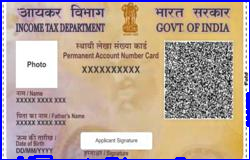

In [35]:
# display the original images with contours
print("original format Image")
Image.fromarray(original)

tampered format image


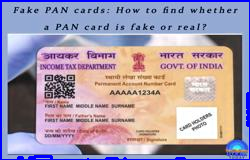

In [36]:
print("tampered format image")
Image.fromarray(tampered)

difference images


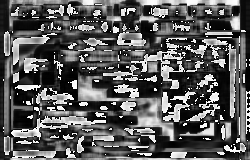

In [37]:
# display difference image with black; it is the difference between original and tampered
print("difference images")
Image.fromarray(diff)

 threshold of images


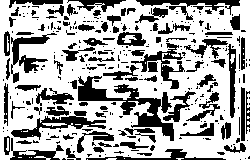

In [38]:
# display the threshold  # it is the threshold between tampered and original images
print(" threshold of images")
Image.fromarray(thresh)

# Summary

# Scope

 This projecet can be usesd in different organizations where customers or users need to provide any kind of ID in order to get themselves verified. The organization can use this project to find out whether the ID is original or fake, Similarly this can be used for any type of ID like voter id, student ID etc.